## Problem 1

$$\Lambda=
\begin{pmatrix}
0 & 2/5 & 1/5 & 0 & 0\\
0 & 0 & 3/4 & 1/4 &0\\
1/2 & 0 & 0 & 1/2 & 0\\
0 & 0 & 1/3 & 0 & 2/3\\
0 & 1/3 & 0 & 1/3 & 0
\end{pmatrix}$$



### 1.a

In order to measure the the average time it takes a particle to start in node $a$ and then return to $a$ itself, it was performed a simulation exploiting the matrix $Q$. To avoid outliers, the result of 1000 simulations was averaged, returning an average time equal to $6.478$.

### 1.b

To compute analytically the return time we can use several approaches.
Since the graph is strongly connected, it is possible compute it as: $$\mathbb{E}_a[T_a^+] = \dfrac{1}{\omega_a * \overline{\pi_a}} = \dfrac{1}{1*0.1481} = 6.750$$

Another approach is to solve recursevely the following equation:

$$
\mathbb{E}_a[T_a^+] = \dfrac{1}{\omega_a} + \sum_{j} P_{a,j} \mathbb{E}_j[T_a]
$$

To compute this formula, we know that $\mathbb{E}_a[T_a] = 0$ and that $\mathbb{E}_j[T_a] = \dfrac{1}{\omega_j} + \sum_{j} P_{a,j} \mathbb{E}_j[T_a]$ is the expected hitting time to the set $S={a}$ starting from $j$.


To accomplish this in python, we need to write the previous statements in a matrix formulation. We can index the matrix $P$ and vector $\omega$ so that $\hat{P} = P_{|RxR}$ and $\hat{\omega} = \omega_{|R}$ with $R = \mathcal V \setminus S$ (in this case $S$ is just $a$). If we put $\hat{x}= (\mathbb{E}_j[T_a])$ with $j \in R = \mathcal V \setminus a$, we can solve the linear system:

$$
\hat{x} = (I - \hat{P})^{-1} z    
$$

with $z_i=\dfrac{1}{\hat{\omega_i}}$

and then compute the average return times.

The result obtained with the simulations is close to that computed analytically. If we average more simulations, the results are more accurate and stable.

### 1.c

For this point, we can use the same function of the exercise ***1.a***. In this case, we need to specify as a origin the node $o$ and as destination the node $d$. There were performed 1000 simulations and the average time it takes to move from node $o$ to node $d$ is $8.562$.

### 1.d

In this case we can apply the same reasoning of point ***1.b*** in order to compute the hitting times but without having to compute the return times.

The theoretical hitting-time $\mathbb{E}_j[T_d]$ can be written as:

$$
\dfrac{1}{\omega_j} + \sum_{j} P_{j,d} \mathbb{E}_j[T_d]
$$

We can compute it in python solving the same linear system of exercise ***1.b*** (but with $S$ equal to $d$ and not $a$ in this case)
and instead of computing the average return time, we just take entry $\mathbb{E}_o[T_d]$ of the solution of that system.
The theoretical solution $8.785$ is again close to that obtained with the simulations.

## Problem 2

### 2.a

Since we are dealing with non interacting particles, we can compute a simulation for each of the 100 particles and then average the results. But, instead of computing the average for each particle (1000 simulation for each one) and then the average over the 100 particles, we can just compute 100 * 1000 simulations (in exercise ***1.a*** there were performed 1000 simulations for 1 particle).

With this approach, we get that the average time for a particle to return to node $a$, if all particles start in node $a$, is $6.763$.
Since we are averaging over 100000 simulations, the result is more stable and closer to the theoretical one than that computed with just 1 particle.

### 2.b

The starting setting of this exercise is with 100 particles on the node $o$. When the clock ticks (with a rate equal to the number of particles in the system), the starting node is chosen proportionally to the number of particles that are in the nodes. Regarding the ending node instead, we can exploit the matrix $Q$ as in the exercise ***1.a***. This is done until we reach 60 time units. At the end of the simulation, we can average the distribution of the particles in each node throughout the experiment. The obtained average number of particles for each node  was:

$$
o = 20.85 \quad a = 14.71 \quad b = 21.84 \quad c = 21.26 \quad d = 21.35
$$

The following plot shows the particle distribution in the nodes during the simulation:
![Particle evolution](./2_b.png)

If we compare the previous results with the stationary distribution of the continuous-time $\overline{\pi}$, we can see that they are close.

$$
\overline{\pi} = (0.1852, 0.1481, 0.2222, 0.2222, 0.2222)'
$$


## Problem 3

$$\Lambda_{open}=
\begin{pmatrix}
0 & 2/3 & 1/3 & 0 & 0\\
0 & 0 & 1/4 & 1/4 & 2/4\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0
\end{pmatrix}$$

### 3.a

In the first scenario, we had a poisson clock proportional to the number of particles in each node. After performing the simulation with several rates (the figures below have rates respectively of 1, 10, 100), we can see that the higher the rate, the higher the number of particles that the nodes pass. When the rate is higher, we can notice that the simulation doesn't blow up and the number of particles in the nodes is more stable during time since the rate is updating proportionally to the number of particles.

![Particle evolution](./3_a_1.png)
![Particle evolution](./3_a_10.png)
![Particle evolution](./3_a_100.png)


### 3.b

In the scenario with a fixed rate, 
The pictures below show the evolution of the number of particles in each node of the network in a simulation for 60 time units. The rates are respectively 1, 1.5 and 0.7.
![Particle evolution](./3_b_1.png)
![Particle evolution](./3_b_1.5.png)
![Particle evolution](./3_b_0.7.png)


For rates greater than one, the number of nodes explodes, while, if the rate is 1, it is unstable and the system could still blow up in some simulations. For smaller rates, such as 0.7, the particle distribution in the nodes is handled better.
The difference from the previous point is that the rate is fixed, so even if the particles increase, it will stay the same. If too many particles will enter in the system, in this setting they will leave it with more "difficulty" than that of the previous point.



# Code for the assignment

In [183]:
import networkx as nx
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys

np.random.seed(seed=42)

## Problem 1

In [184]:
Lambda = [
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0],
]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)

Q = Lambda/w_star
Q = Q + np.diag(np.ones(len(w)) - np.sum(Q, axis=1))

values, vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:, index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)
print (w)

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]
[0.6        1.         1.         1.         0.66666667]


In [185]:
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# Compute invariant distribution
values,vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi = vectors[:,index].real
pi = pi/np.sum(pi)
print("pi=", pi)

pi= [0.13043478 0.17391304 0.26086957 0.26086957 0.17391304]


### a)What is, according to the simulations, the average time it takes a particle that starts in node a to leave the node and then return to it?

In [186]:
# Node "a" is represented by the node "1" in this simulation

def simulate(origin, destination, n_simulations):
    
    Q_cum = np.cumsum(Q, axis=1)

        
    print(f"Starting node: {origin}")

    n_simulations = n_simulations

    lastTimes = np.zeros(n_simulations, dtype=float)

    for i in range(n_simulations):
        pos = []

        pos.append(origin)

        transition_times = []

        transition_times.append(0)
        
        # using as rate w_star
        t_next = -np.log(np.random.rand())/w_star

        node_counter = 0

        while True:

            node_counter += 1
            
            # append index
            pos.append(np.argwhere(Q_cum[pos[node_counter-1]] > np.random.rand())[0][0])

            transition_times.append(transition_times[node_counter-1] + t_next)
                        

            if pos[node_counter] == destination:
                break

            t_next = -np.log(np.random.rand())/w_star



        lastTimes[i] = transition_times[-1]


    print(f"Average return time for particle starting in a: {np.average(lastTimes)}")




In [187]:
simulate(origin=1, destination=1, n_simulations=1000)

Starting node: 1
Average return time for particle starting in a: 6.477511818776824


### b)How does the result in a) compare to the theoretical return-time $Ea[T^+_a]$?

In [188]:
n_nodes = len(P)

node = 1
S = [node]

R = [node for node in range(n_nodes) if node not in S]

# sub-indexing P and w
hatP = P[np.ix_(R, R)]
hatw = w[np.ix_(R)]

hatx = np.linalg.solve((np.identity(n_nodes-len(S))-hatP), np.ones(n_nodes-len(S))/hatw)


# hitting time is 0 if the starting node is in S
hitting_s = np.zeros(n_nodes)
# hitting time is hat(x) for nodes in R
hitting_s[R] = hatx

# compute the return time
return_times_analytical = 1/w[1] + np.dot(P[1,:], hitting_s)


print(return_times_analytical)

6.749999999999998


### c)What is, according to the simulations, the average time it takes to move from nodeoto noded?

In [189]:
simulate(origin=0, destination=4, n_simulations=1000)

Starting node: 0
Average return time for particle starting in a: 8.562036771264077


### d)How does the result in c) compare to the theoretical hitting-time $Eo[Td]$?

In [190]:

S = [4]

R = [node for node in range(5) if node not in S]

hatP = P[np.ix_(R, R)]
hatw = w[np.ix_(R)]

hatx = np.linalg.solve((np.identity(n_nodes-len(S))-hatP), np.ones(n_nodes-len(S))/hatw)

hitting_s = np.zeros(n_nodes)

hitting_s[R] = hatx

print(hitting_s[[0]])

[8.78571429]


## Problem 2

### Particle perspective

In [191]:
simulate(origin=1, destination=1, n_simulations=100*1000)

Starting node: 1
Average return time for particle starting in a: 6.762984812206989


### Node perspective

In [208]:
# stating with 100 particles in node 'o'
hist_nodes = np.array([[100., 0, 0, 0, 0 ]], dtype=float)


n_nodes = np.zeros(5, dtype = float)
n_nodes[0] = 100.
P_nodes = n_nodes/100
P_nodes_cum = np.cumsum(P_nodes)
transition_times = []
transition_times.append(0)

Q_cum = np.cumsum(Q, axis=1)


t_next = -np.log(np.random.rand())/100
i = 0

timeSeq = []
timeSeq.append(0)


while transition_times[i]<60:

    i += 1 

    transition_times.append(transition_times[i-1] + t_next )

    timeSeq.append(transition_times[-1])


    start_index = np.argwhere(P_nodes_cum > np.random.rand())[0][0]


    dest_index = np.argwhere(Q_cum[start_index] > np.random.rand())[0][0]

    n_nodes[dest_index] += 1


    n_nodes[start_index] -= 1 
    
    hist_nodes = np.concatenate((hist_nodes, [n_nodes]), axis = 0)

    P_nodes=n_nodes/100

    P_nodes_cum = np.cumsum(P_nodes)

    t_next = -np.log(np.random.rand())/100


n_nodes

array([16., 15., 21., 23., 25.])

In [209]:
print(np.average(hist_nodes, axis=0))

[20.84686502 14.70684149 21.84266263 21.25819465 21.34543621]


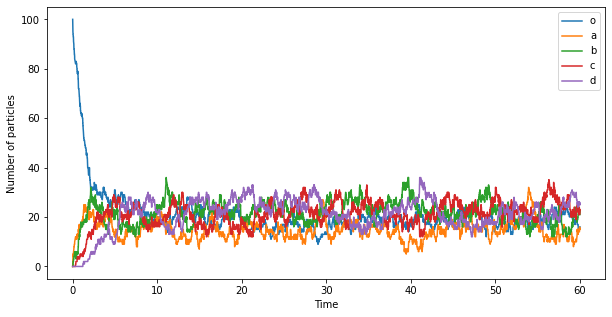

In [210]:
fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(timeSeq, hist_nodes[:, i], label=labels[i])
    
ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig("2_b.png")
plt.show()


In [134]:
pi_bar

array([0.18518519, 0.14814815, 0.22222222, 0.22222222, 0.22222222])

## Problem 3

In [229]:
Lambda_open = [
    [0, 2/3, 1/3, 0, 0],
    [0, 0, 1/4, 1/4, 2/4],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
]

w = np.sum(Lambda_open, axis=1)
w_star = np.max(w)
Q = Lambda_open/w_star
Q = Q + np.diag( np.ones(len(w)) - np.sum(Q, axis=1) )

### a)Proportional rate

In [136]:
def get_starting_node(node_particles, rate):
    particles = rate

    # 1 dummy variable for entry in node 'o'
    # Particles in nodes
    n_nodes = np.zeros(6)
    n_nodes[5] = rate

    particles += np.sum(node_particles)

    for i in range(5):
        n_nodes[i] = node_particles[i]

    particles_cum = np.cumsum(n_nodes)/particles
    start_node = np.argwhere(particles_cum > np.random.rand())[0][0]
    #print(start_node)

    return start_node, particles

In [137]:
def simulate(time_units, rate):
    #particles in node
    node_particles = np.zeros(5)

    transition_times = []
    transition_times.append(0)

    hist_nodes = np.array([[0, 0, 0, 0, 0]])

    Q_cum = np.cumsum(Q, axis=1)


    while True:

        start_node, particles = get_starting_node(node_particles, rate)
        t_next = transition_times[-1] - np.log(np.random.rand()) / particles
        
        # check dummy variable
        if start_node == 5:
            node_particles[0] += 1 

        elif start_node == 4:
            node_particles[4] -= 1 

        else:
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1 
            node_particles[end_node] += 1

        transition_times.append(t_next)

        hist_nodes = np.concatenate((hist_nodes, [node_particles]), axis = 0)
        
        if t_next > time_units:
            break

    return hist_nodes, transition_times


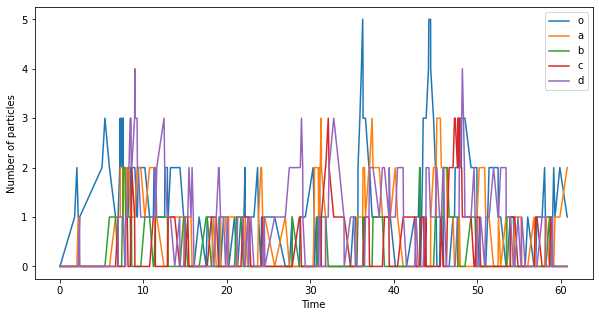

In [138]:
hist_nodes, transition_times = simulate(60, 1)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig("3_a_1.png")
plt.show()

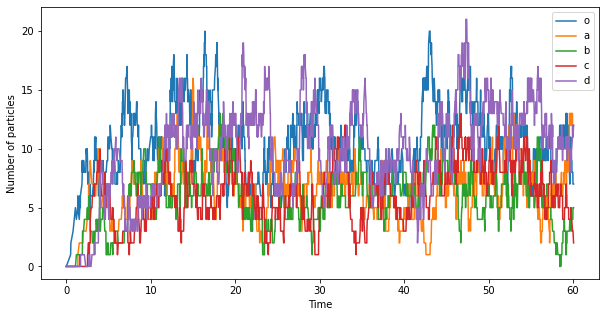

In [140]:
hist_nodes, transition_times = simulate(60, 10)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig("3_a_10.png")
plt.show()

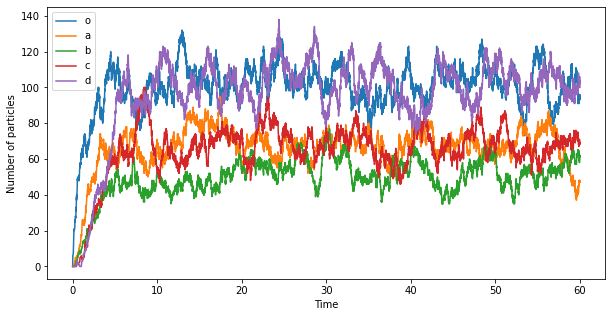

In [144]:
hist_nodes, transition_times = simulate(60, 100)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig("3_a_100.png")
plt.show()

### b)Fixed Rates

In [250]:
def get_starting_node(rate):
    total_rate = rate

    # 1 dummy variable for entry in node 'o'
    n_nodes = np.zeros(6)
    n_nodes[5] = rate
        
    for i in range(5):
        n_nodes[i] = 1
        total_rate += 1
    
    particles_cum = np.cumsum(n_nodes)/total_rate
    
    start_node = np.argwhere(particles_cum > np.random.rand())[0][0]
    
    return start_node, total_rate

In [251]:
def simulate(time_units, rate):
    
    node_particles = np.zeros(5)

    transition_times = []
    transition_times.append(0)

    hist_nodes = np.array([[0, 0, 0, 0, 0]])

    Q_cum = np.cumsum(Q, axis=1)


    while True:

        start_node, total_rate = get_starting_node(rate)
        t_next = transition_times[-1] - np.log(np.random.rand()) / total_rate

        #print(total_rate)
        
        # check dummy variable
        if start_node == 5:
            node_particles[0] += 1 
        
        elif node_particles[start_node] == 0:
            # Do nothing if I don't have any particle
            # Check after if start_nod == 5 but before start_node == 4.
            pass      

        elif start_node == 4:
            node_particles[4] -= 1 


        else:
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1 
            node_particles[end_node] += 1

        #print(hist_nodes)

        transition_times.append(t_next)


        hist_nodes = np.concatenate((hist_nodes, [node_particles]), axis = 0)
        
        if t_next > time_units:
            break

    return hist_nodes, transition_times


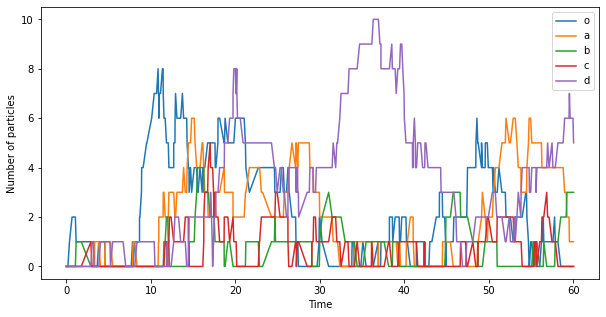

In [257]:
hist_nodes, transition_times = simulate(60, 1)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig('3_b_1.png')
plt.show()

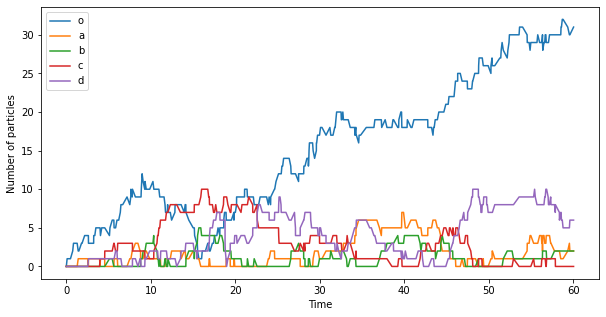

In [259]:
hist_nodes, transition_times = simulate(60, 1.5)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig('3_b_1.5.png')
plt.show()

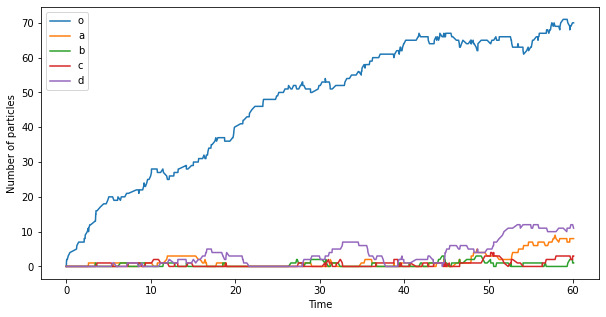

In [240]:
hist_nodes, transition_times = simulate(60, 2)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig('3_b_2.png')
plt.show()

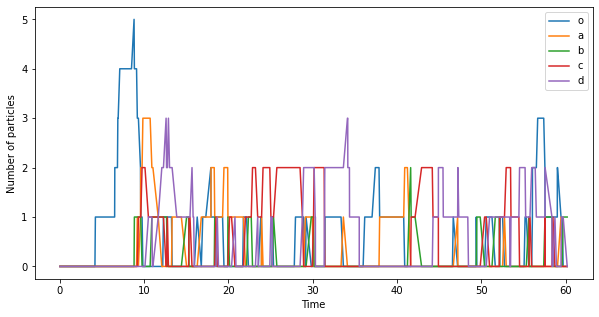

In [264]:
hist_nodes, transition_times = simulate(60, 0.7)

fig, ax = plt.subplots(figsize=(10,5)) 
labels={0:'o',1:'a',2:'b',3:'c',4:'d'}

for i in range(5):
    ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

ax.legend()
plt.xlabel('Time')
plt.ylabel('Number of particles')
plt.savefig('3_b_0.7.png')
plt.show()